In [ ]:
Data Analysis with Kaggle Data Set

Retreve Dataset

Data cleansing

Data Processing

Data Analysis Univariate

Data Analysis Multivariate

Hypthesis Test

Feature Engineering

Model

Measure and Performence

Conclusion and Recomnandations

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
#Retreive dataset for commune file
commune_path="commune.xlsx"
commune_data= pd.read_excel(commune_path)

# Dataset Cleaning for commune file
# First i remove a repeated column and 
# after that i rename the column of the dataset
drop_cols=['Commune_en']
commune_data.drop(columns=drop_cols, inplace=True)
commune_cols=['commune','commune_id', 'departement','departement_id']
commune_data.columns=commune_cols
commune_data=commune_data.set_index('commune_id')
commune_data.head()

,commune,departement,departement_id
commune_id,,,
HT0812,Abricots,Grande'Anse,HT08
HT0321,Acul du Nord,North,HT03
HT0922,Anse-à-Foleur,North-West,HT09
HT0234,Anse-à-Pître,South-East,HT02
HT1021,Anse-à-Veau,Nippes,HT10


In [100]:
#check for null values in commune dataset
def check_null(data):
    null=data.isna().sum()
    return null

In [101]:
check_null(commune_data)

commune           0
departement       0
departement_id    0
dtype: int64

In [82]:
check_null=commune_data.isnull().values.any()
check_null

False

In [88]:
#Retreive dataset for quest file
quest_path="quest.csv" 
quest_data=pd.read_csv(quest_path, index_col=0)

# Dataset Cleaning for quest file
# First i remove some unnecessary columns and 
# after that i rename the other columns of the dataset
drop_cols=['modified_at','formal_sector_job','after_AA','department']
quest_data.drop(columns=drop_cols, inplace=True)

quest_cols=['gender','dob','commune_id','created_at','education_level','university','study_domain','current_employed','computer_home','internet_home','hear_AA','quest_id']
quest_data.columns=quest_cols

#set the data in quest.commune_id to upper
quest_data['commune_id']=quest_data['commune_id'].str.upper()

#replace a wrong date format in the dataset
quest_data['dob'] = quest_data['dob'].replace(['3 aout 1977'],'03/08/1977')

#set commune_id to index
quest_data=quest_data.set_index('commune_id')

#set dob column to datetime type
quest_data['dob'] = pd.to_datetime(quest_data['dob'])
#quest_data['created_at'] = pd.to_datetime(quest_data['created_at'])
#quest_data.head()

In [91]:
#This line fill all the null values in dob column
quest_data.dob=quest_data['dob'].fillna(value=quest_data.dob.mean())

In [92]:
#replace null value in study_domain with the mode value
quest_data['study_domain'] = quest_data['study_domain'].replace(['[]'],quest_data['study_domain'].mode())

In [93]:
quest_data['study_domain'].value_counts()

['item1']                      86
['other']                      63
['item6']                      19
['item3']                      12
['item2']                       9
['item5']                       8
['item7']                       8
['item2', 'item3']              7
['item8']                       6
['item1', 'item6']              5
['item6', 'item7']              2
['item3', 'item6']              2
['item6', 'item3']              2
['item1', 'other']              2
['item4', 'item1']              2
['item3', 'item2']              2
['item6', 'other']              2
['item1', 'item7']              1
['item1', 'item5']              1
['item1', 'other', 'item6']     1
['item4', 'item3']              1
['item3', 'item1']              1
['item1', 'item3']              1
['item5', 'item6', 'other']     1
['item5', 'other']              1
['item5', 'item6']              1
['item2', 'item3', 'other']     1
['item4', 'item1', 'item6']     1
['item6', 'item1']              1
['item7', 'oth

In [102]:
#check nul values
check_null(quest_data)

gender              0
dob                 0
created_at          0
education_level     0
university          0
study_domain        0
current_employed    0
computer_home       0
internet_home       0
hear_AA             0
quest_id            0
dtype: int64

In [98]:
quest_data.shape

(250, 11)

In [99]:
check_null=quest_data.isnull().values.any()
print(check_null)

False


In [104]:
def check_duplicate(data):
    duplicate=data.duplicated().sum()
    return duplicate

In [105]:
check_duplicate(quest_data)

0

In [106]:
#shape of dataset before merge
print(quest_data.shape)
print(commune_data.shape)

(250, 11)
(140, 3)


In [107]:
dataset = pd.merge(left =commune_data,right=quest_data,how="inner",on="commune_id")

In [108]:
dataset

,commune,departement,departement_id,gender,dob,created_at,education_level,university,study_domain,current_employed,computer_home,internet_home,hear_AA,quest_id
commune_id,,,,,,,,,,,,,,
HT0731,Aquin,South,HT07,male,1995-12-05,2021-02-16,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item6', 'item1']",No,Yes,Yes,Friend,9069789e-ce95-11eb-883e-7c67a234f601
HT0311,Cap-Haïtien,North,HT03,male,1995-09-16,2021-02-21,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['other'],Yes,Yes,Yes,Facebook,906a79ae-ce95-11eb-98c3-7c67a234f601
HT0311,Cap-Haïtien,North,HT03,male,1987-04-19,2021-02-21,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['item1'],No,Yes,No,Friend,906a79af-ce95-11eb-bd36-7c67a234f601
HT0311,Cap-Haïtien,North,HT03,male,1991-09-08,2021-03-03,Other,unknown,['item7'],No,Yes,No,Facebook,906aa0a0-ce95-11eb-8355-7c67a234f601
HT0311,Cap-Haïtien,North,HT03,male,1987-02-22,2021-03-05,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),"['item7', 'other']",No,Yes,Yes,Facebook,906aa0a1-ce95-11eb-899e-7c67a234f601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HT0118,Tabarre,West,HT01,male,1988-09-17,2021-03-07,Bachelors (bacc +4),unknown,"['item6', 'item3']",No,Yes,No,LinkedIn,9066879b-ce95-11eb-9d4a-7c67a234f601
HT0118,Tabarre,West,HT01,male,1997-11-23,2021-03-09,Bachelors (bacc +4),Centre de Techniques de Planification et d'Eco...,"['item2', 'item3']",No,Yes,Yes,WhatsApp,9066abb5-ce95-11eb-aa16-7c67a234f601
HT0532,Verrettes,Artibonite,HT05,male,1980-12-04,2021-02-21,Other,unknown,"['item1', 'item7']",Yes,Yes,Yes,WhatsApp,906a52b7-ce95-11eb-9c4b-7c67a234f601


In [20]:
dataset.isna().sum()
dataset.shape

(250, 14)

In [408]:
#study_domain_path="study_domain.csv"
#study_domain_data=pd.read_csv(study_domain_path, index_col=0)
#study_domain_data.drop(columns='key', inplace=True)
#study_domain_cols=['key','study_domain','quest_id']
#study_domain_data.columns=study_domain_cols
#study_domain_data=study_domain_data.set_index('quest_id')
#study_domain_data

In [409]:
#vartest=study_domain_data['quest_id'].value_counts()
#vartest.head(25)

In [315]:
#Extract each values of "Study_domain" and place them into a separate Columns before Merge
# study_domain_data = pd.get_dummies(data=study_domain_data[["quest_id","key", "study_domain"]], columns=['study_domain'], prefix="",prefix_sep="")
# study_domain_data = study_domain_data.groupby("quest_id").sum()


In [410]:
#study_domain_data

In [411]:
#dataset.set_index('quest_id')

In [391]:
# dataset = pd.merge(left =dataset,right=study_domain_data,how="inner",on="quest_id")

In [412]:
# dataset

In [413]:
#dataset.set_index('quest_id')

In [414]:
# technology_path='technology.csv'
# technology_data=pd.read_csv(technology_path, index_col=0)
# #technology_data.drop(columns='key', inplace=True)
# technology_cols=["key", 'technology', 'quest_id']
# technology_data.columns=technology_cols
# #technology_data=technology_data.set_index('quest_id')
# technology_data

In [415]:
# #Extract each values of "Study_domain" and place them into a separate Columns before Merge
# technology_data = pd.get_dummies(data=technology_data[["quest_id","key", "technology"]], columns=['technology'], prefix="",prefix_sep="")
# technology_data = technology_data.groupby("quest_id").sum()

In [416]:
# dataset = pd.merge(left =dataset,right=technology_data,how="inner",on="quest_id")

In [32]:
dataset.head(2)

,commune,departement,departement_id,gender,dob,created_at,education_level,university,study_domain,current_employed,computer_home,internet_home,hear_AA,quest_id
commune_id,,,,,,,,,,,,,,
HT0731,Aquin,South,HT07,male,1995-12-05,2021-02-16,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item6', 'item1']",No,Yes,Yes,Friend,9069789e-ce95-11eb-883e-7c67a234f601
HT0311,Cap-Haïtien,North,HT03,male,1995-09-16,2021-02-21,Bachelors (bacc +4),Université d'Etat d'Haïti (UEH),['other'],Yes,Yes,Yes,Facebook,906a79ae-ce95-11eb-98c3-7c67a234f601


In [77]:
#dataset.set_index('quest_id')
#np.linspace(start=0, stop=10, endpoint=True, num=100)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, HT0731 to HT0532
Data columns (total 14 columns):
commune             250 non-null object
departement         250 non-null object
departement_id      250 non-null object
gender              250 non-null object
dob                 250 non-null datetime64[ns]
created_at          250 non-null object
education_level     250 non-null object
university          250 non-null object
study_domain        250 non-null object
current_employed    250 non-null object
computer_home       250 non-null object
internet_home       250 non-null object
hear_AA             250 non-null object
quest_id            250 non-null object
dtypes: datetime64[ns](1), object(13)
memory usage: 29.3+ KB


In [23]:
dataset.describe()

,commune,departement,departement_id,gender,dob,created_at,education_level,university,study_domain,current_employed,computer_home,internet_home,hear_AA,quest_id
count,250,250,250,250,250,250,250,250,250,250,250,250,250,250
unique,35,9,9,2,237,28,6,7,30,3,3,3,10,250
top,Delmas,West,HT01,male,1994-03-13 18:05:54.098360704,2021-02-17,Bachelors (bacc +4),unknown,['item1'],No,Yes,Yes,Friend,9069a207-ce95-11eb-9148-7c67a234f601
freq,71,214,214,203,6,41,148,95,86,180,234,210,67,1
first,NaN,NaN,NaN,NaN,1970-07-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2021-08-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
def percent_colunm_null_values(data):
   result =  data.isna().sum()/data.shape[0]
   return result[result>0.0]

percent_colunm_null_values(data=dataset)

Series([], dtype: float64)

In [51]:
gender_total=dataset['gender'].value_counts(normalize=False).to_frame()
gender_total.rename(columns={"Sex": "Total"},inplace=True)
gender_total

,gender
male,203
female,47


In [64]:
my_pivot =  pd.pivot_table(data=dataset,index="hear_AA",columns="gender",values ="quest_id",aggfunc="count")
my_pivot

gender,female,male
hear_AA,,
Ayiti Analytics Website,4.0,11.0
Bootcamp Alumni,8.0,6.0
ESIH,5.0,13.0
Facebook,6.0,34.0
Friend,11.0,56.0
Instagram,1.0,4.0
LinkedIn,1.0,14.0
WhatsApp,9.0,57.0
other,2.0,7.0


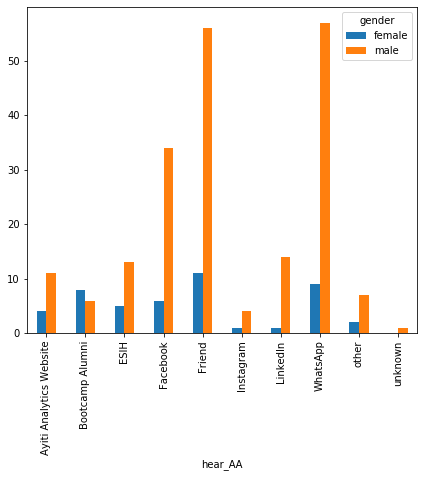

In [75]:
ax=my_pivot.plot(kind='bar')
fig = ax.get_figure()
# Change the plot dimensions (width, height)
fig.set_size_inches(7, 6)

In [73]:
sns.barplot(x='hear_AA', y='quest_id', hue='gender', data=my_pivot)

ValueError: Could not interpret input 'hear_AA'

In [25]:
def dataset_cardinalite(dataset,is_number=True):
  """
  Fonksyon sila kalkile ansanm valè inik (non lan oubyen lis la) pou chak kolòn
  @params dataset : dataset ou ap pase fonksyon a
  @params is_number : pèmèt fonskyon an touten yon lis inik ou nonb inik valè kolòn yo
  """
  # kreye yon diksyon
  my_dict = dict()
  # seleksyone chak kolòn
  for col in dataset.columns:
    # sovgade kadinailte avèk valè inik yo nan kolòn sa
    if is_number:
      my_dict[col] = dataset[col].nunique()
    else:
       my_dict[col] = dataset[col].unique()
  # retounen diksyonè sila
  return my_dict

In [31]:
dataset_cardinalite(dataset)

{'commune': 35,
 'departement': 9,
 'departement_id': 9,
 'gender': 2,
 'dob': 237,
 'created_at': 28,
 'education_level': 6,
 'university': 7,
 'study_domain': 30,
 'current_employed': 3,
 'computer_home': 3,
 'internet_home': 3,
 'hear_AA': 10,
 'quest_id': 250}

In [448]:
prob_female =  dataset[dataset.gender == "female"].shape[0] / 0.25
prob_female

188.0

In [449]:
dataset.shape[0]

250

In [450]:
dataset[dataset.gender == "female"].shape[0]

47

In [65]:
def generate_barchart(data="", title ="",abs_value ="",rel_value="",figsize =(10,6)):
  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  for tot, perc in zip(data[abs_value],data[rel_value]):
    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color='White',fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()


In [67]:
#generate_barchart(data="dataset",title="gender",abs_value="hear_AA",rel_value="gender")

In [456]:
total =dataset.groupby(by=["gender"]).departement.count().to_frame()
total.columns = ["% Per Departement"]

In [34]:
dataset.head(1)

,commune,departement,departement_id,gender,dob,created_at,education_level,university,study_domain,current_employed,computer_home,internet_home,hear_AA,quest_id
commune_id,,,,,,,,,,,,,,
HT0731,Aquin,South,HT07,male,1995-12-05,2021-02-16,Bachelors (bacc +4),Ecole Supérieure d'Infotronique d'Haïti (ESIH),"['item6', 'item1']",No,Yes,Yes,Friend,9069789e-ce95-11eb-883e-7c67a234f601


In [36]:
#Variable qualitative
var_desc=['commune', 'departement', 'gender', 'education_level','computer_home','internet_home','hear_AA']

In [38]:
new_dataset=dataset[var_desc]
new_dataset.head()

,commune,departement,gender,education_level,computer_home,internet_home,hear_AA
commune_id,,,,,,,
HT0731,Aquin,South,male,Bachelors (bacc +4),Yes,Yes,Friend
HT0311,Cap-Haïtien,North,male,Bachelors (bacc +4),Yes,Yes,Facebook
HT0311,Cap-Haïtien,North,male,Bachelors (bacc +4),Yes,No,Friend
HT0311,Cap-Haïtien,North,male,Other,Yes,No,Facebook
HT0311,Cap-Haïtien,North,male,Bachelors (bacc +4),Yes,Yes,Facebook


In [68]:
def prob_category(data,col="", abs_value ="",rel_value ="",show_plot=False, title=""):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1)
   else:
     result = pd.concat([res1,res2],axis=1)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =(10,6))
     return result